# Baseline model 

Ideas based on analysis:
- Using an average of one of the categorical variables as the sole predictor
- Using a combination of 2 or more (possibly all) of the categorical variables and calculating the average as the predictors
- Be able to incorporate the continuous variables
    + we can calculate the average of each of the values, subtract those averages from the mean of the overall salary data and add it to the prediction

*fitting the numeric data*
1. calculate the mean of the target on the data used for fitting
2. calculate the average salary per each value of the numeric variable (0-25 for years, 0 - 99 for miles)
3. get a difference between the grouped averages and the overall average
4. store it

*predictions with numeric predictors*
(this is after the category predictions are made)
1. after ensuring that the variables are in the data
2. loop over the self.numeric_vars list and join with on = the looping var (key of the dict) 
3. take the rowsum of the category preds and the numeric diff columns 
4. drop category preds and the numeric diff columns 
5. profit

___

In [76]:
import pandas as pd
import numpy as np
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from src.eda_utils import salary_per_category_table
from src.Baseline import BaselineModel

# Load data

In [2]:
train_salaries = pd.read_csv("../data/interim/salaries_train_85_15_split.csv", index_col = 0)
test_salaries = pd.read_csv("../data/interim/salaries_test_85_15_split.csv", index_col = 0)

In [3]:
print(f"training set shape: {train_salaries.shape}")
print(f"test set shape: {test_salaries.shape}")

training set shape: (850000, 8)
test set shape: (150000, 8)


#### steps for running all combos of baseline models

- get all combinations
    - make a list of each categorical variable as an element  
    - extend the list with all 2&3 combos as well as the list of all four variables -- each element of this list is a 'category_var' argument to try  
    - for each element in the combo list  
        - for each element of the numeric_combos
            - init baseline model with the params  
            - run evaluate which spits out main metrics  
            - assemble these metrics into a list of  



#### All combinations of categorical variables

In [4]:
numeric_combos = [None, 'yearsExperience', 'milesFromMetropolis', ['yearsExperience', 'milesFromMetropolis']]
category_vars = ['jobType', 'degree', 'major', 'industry']


category_combos = []
for i in range(1,5):
    combos = combinations(category_vars, i)
    for j in combos:
        category_combos.append(list(j))

category_combos

[['jobType'],
 ['degree'],
 ['major'],
 ['industry'],
 ['jobType', 'degree'],
 ['jobType', 'major'],
 ['jobType', 'industry'],
 ['degree', 'major'],
 ['degree', 'industry'],
 ['major', 'industry'],
 ['jobType', 'degree', 'major'],
 ['jobType', 'degree', 'industry'],
 ['jobType', 'major', 'industry'],
 ['degree', 'major', 'industry'],
 ['jobType', 'degree', 'major', 'industry']]

In [5]:
len(category_combos)

15

# `BaselineModel` Class

*Params*
- constructor:
    + grouping_vars: list of categorical variables to group on for fitting
    + numeric_vars:  list of numerical variables to fit 
    
*Methods*
- fit():
    + For the grouping variables, this calculates the average salary per group and stores this values with each grouping variable as an index
    + For the numeric variables, this groups by each value and calculates the mean and stores it with each value of the variable as the index and the average as the value

In [6]:
BL = BaselineModel(category_vars = ['jobType'], numeric_vars = ['yearsExperience', 'milesFromMetropolis'])

BL.fit(train_salaries)

In [7]:
BL.fitted_category_salaries

,salary_preds
jobType,
JANITOR,70.803050
JUNIOR,95.293570
SENIOR,105.453358
MANAGER,115.373455
VICE_PRESIDENT,125.408850
CFO,135.419149
CTO,135.436604
CEO,145.294699


In [8]:
BL.fitted_numeric_salaries

{'yearsExperience': yearsExperience
 0    -24.075262
 1    -22.003893
 2    -19.902739
 3    -18.064601
 4    -16.006295
 5    -14.357224
 6    -12.178370
 7     -9.936446
 8     -8.204512
 9     -5.968044
 10    -3.909673
 11    -2.123951
 12     0.303384
 13     1.826478
 14     4.310913
 15     5.845097
 16     7.997639
 17     9.969655
 18    12.200942
 19    14.059601
 20    16.066983
 21    18.083717
 22    20.265988
 23    22.417038
 24    23.962186
 Name: yearsExperience_diff, dtype: float64,
 'milesFromMetropolis': milesFromMetropolis
 0     19.493479
 1     19.439336
 2     18.596964
 3     18.781135
 4     19.073243
         ...    
 95   -17.967574
 96   -18.699601
 97   -18.714007
 98   -19.227586
 99   -20.227277
 Name: milesFromMetropolis_diff, Length: 100, dtype: float64}

In [9]:
preds = BL.predict(train_salaries, return_only_preds = False, return_all_cols=True)
preds

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,salary_preds,yearsExperience_diff,milesFromMetropolis_diff,sum_numeric_diff,mean_numeric_diff,preds_with_sum,preds_with_mean,category_preds_tmp
891719,JOB1362685299406,SENIOR,BACHELORS,PHYSICS,WEB,21,68,128,116.172347,18.083717,-7.364728,10.718989,5.359495,116.172347,110.812852,105.453358
177062,JOB1362684584749,CTO,NONE,NONE,HEALTH,1,14,116,127.494060,-22.003893,14.061349,-7.942544,-3.971272,127.494060,131.465332,135.436604
27080,JOB1362684434767,SENIOR,HIGH_SCHOOL,NONE,OIL,11,49,133,103.411285,-2.123951,0.081878,-2.042073,-1.021036,103.411285,104.432322,105.453358
546274,JOB1362684953961,CEO,NONE,NONE,AUTO,17,65,126,148.675579,9.969655,-6.588774,3.380881,1.690440,148.675579,146.985139,145.294699
832069,JOB1362685239756,JUNIOR,HIGH_SCHOOL,NONE,OIL,24,26,137,129.001496,23.962186,9.745740,33.707926,16.853963,129.001496,112.147533,95.293570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,JOB1362684666865,CTO,HIGH_SCHOOL,NONE,EDUCATION,1,34,113,119.847574,-22.003893,6.414863,-15.589030,-7.794515,119.847574,127.642089,135.436604
365838,JOB1362684773525,VICE_PRESIDENT,BACHELORS,COMPSCI,EDUCATION,2,38,109,110.125792,-19.902739,4.619681,-15.283058,-7.641529,110.125792,117.767321,125.408850
131932,JOB1362684539619,SENIOR,BACHELORS,ENGINEERING,EDUCATION,8,19,123,109.666315,-8.204512,12.417469,4.212957,2.106478,109.666315,107.559836,105.453358
671155,JOB1362685078842,CEO,MASTERS,COMPSCI,WEB,9,30,165,147.796357,-5.968044,8.469702,2.501658,1.250829,147.796357,146.545528,145.294699


In [10]:
print(f"preds_with_sum MSE: {mean_squared_error(preds.salary, preds.preds_with_sum)}")
print(f"preds_with_mean MSE: {mean_squared_error(preds.salary, preds.preds_with_mean)}")

preds_with_sum MSE: 620.6185530723998
preds_with_mean MSE: 705.9972780832111


#### Evaluate function

In [11]:
# Args
cat_arg = ['jobType']
num_arg = ['yearsExperience', 'milesFromMetropolis']

# Instantiate model
mdl = BaselineModel(category_vars=cat_arg, numeric_vars=num_arg)

# Fit the model

# Get training error

# Get test error

# output

In [14]:
mdl.evaluate(train_salaries, test_salaries, numeric_combo = 'mean')

{'training_error': 705.9972780832111, 'test_error': 710.8309714912285}

#### data output of the loop

for each category combo, turn it into the index  
columns measuring MSE for: just categories, years, miles, both, both with mean, both with sum 

In [15]:
category_combos

[['jobType'],
 ['degree'],
 ['major'],
 ['industry'],
 ['jobType', 'degree'],
 ['jobType', 'major'],
 ['jobType', 'industry'],
 ['degree', 'major'],
 ['degree', 'industry'],
 ['major', 'industry'],
 ['jobType', 'degree', 'major'],
 ['jobType', 'degree', 'industry'],
 ['jobType', 'major', 'industry'],
 ['degree', 'major', 'industry'],
 ['jobType', 'degree', 'major', 'industry']]

In [19]:
model_names = ['only_categorical', 'yearsExperience', 'milesFromMetropolis', 'both']

models = {model_names[i]: BaselineModel('jobType', numeric_combos[i]) for i in range(len(model_names))}
models

# for i in category_combos:
#     mdl_categorical = BaselineModel(category_vars = i)
#     mdl_years = BaselineModel(category_vars = i, numeric_vars='yearsExperience')
#     mdl_miles = BaselineModel(category_vars = i, numeric_vars='milesFromMetropolis')
#     mdl_both = BaselineModel(category_vars=i, numeric_vars=['yearsExperience', 'milesFromMetropolis'])

{'only_categorical': <src.Baseline.BaselineModel at 0x2392f4d8048>,
 'yearsExperience': <src.Baseline.BaselineModel at 0x2392f4d8208>,
 'milesFromMetropolis': <src.Baseline.BaselineModel at 0x2392f4d8ec8>,
 'both': <src.Baseline.BaselineModel at 0x2392f39be08>}

#### find_best() function prototype

In [45]:
df_index = []
df_data = []

for categories in category_combos:
    df_row = {}
    df_index.append(", ".join(categories))
    
    models = {model_names[i]: BaselineModel(categories, numeric_combos[i]) for i in range(len(model_names))}
    
    for i in models:
        # For both numeric cols calculate mean and sum methods of combining the numeric predictors
        if i == 'both':
            for combo in ['mean', 'sum']:
                df_row[f'{i}_{combo}'] = models[i].evaluate(train_salaries, test_salaries, numeric_combo = combo)['test_error']
                
        else:
            df_row[i] = models[i].evaluate(train_salaries, test_salaries)['test_error']
    
    df_data.append(df_row)

In [46]:
1e6

1000000.0

In [72]:
test_df = pd.DataFrame(df_data, index = df_index)

In [73]:
test_df

,only_categorical,yearsExperience,milesFromMetropolis,both_mean,both_sum
jobType,970.339894,757.845939,835.945286,710.830971,622.451475
degree,1262.336448,1049.941439,1127.962300,1002.887229,914.567436
major,1288.942168,1075.819089,1155.102219,1029.396013,940.979284
industry,1376.210472,1162.751731,1242.291772,1116.457111,1027.833176
"jobType, degree",873.828005,661.975171,739.758036,614.801962,526.905347
"jobType, major",881.622029,669.262451,747.865518,622.499344,534.506085
"jobType, industry",839.131042,626.756967,705.366412,579.997049,491.992482
"degree, major",1250.085581,1037.621574,1116.118072,990.805182,902.654209
"degree, industry",1130.474565,918.162213,996.770889,871.401910,783.458682
"major, industry",1145.100338,932.045073,1011.902215,885.909003,797.847095


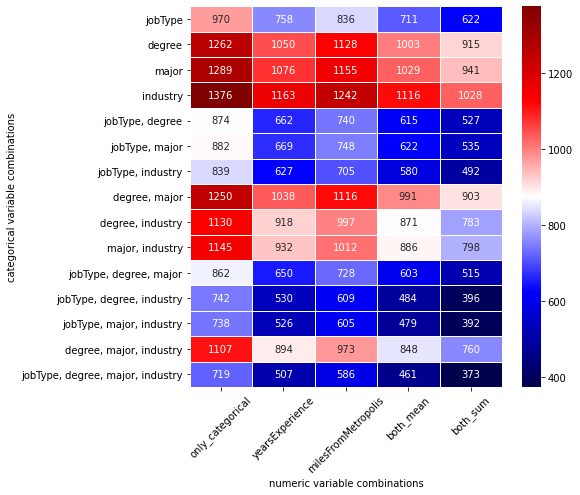

In [117]:
fig = plt.figure(figsize=(7,7))
ax = sns.heatmap(test_df, annot = True, fmt = '.0f', cmap = 'seismic', linewidths = 0.5)
ax.set_xlabel('numeric variable combinations')
ax.tick_params('x', rotation = 45)
ax.set_ylabel('categorical variable combinations')
plt.show()

<AxesSubplot:>

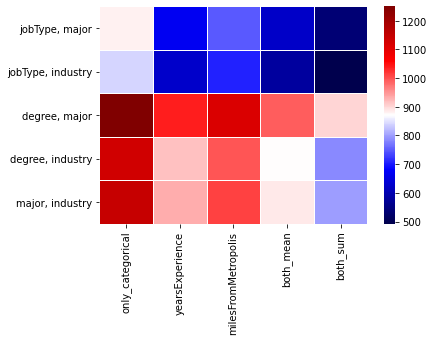

In [105]:
sns.heatmap(test_df.iloc[5:10, :], cmap = 'seismic', linewidths = 0.5)

### insights from best baseline model

in each of the combinations where `jobType` is missing, the MSE is higher than combinations where it is

Interestingly, `industry` when used as a single categorical variable predictor is the worst among any other single categorical predictor. But when it is combined with `jobType` then the two variables together are the best among all two-category combinations

